In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils import class_weight

/home/simran/anaconda3/envs/py3data/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pumps = pd.read_csv("PumpItUp_training_set.csv")
pumps_target = pd.read_csv("PumpItUp_training_set_labels.csv")

In [3]:
pumps_target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
pumps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
pd.options.display.max_columns = None

In [6]:
df = pd.merge(pumps, pumps_target, left_index= True,right_index= True)

In [7]:
df.head(9)

,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_y,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,9944,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,19816,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,54551,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,53934,non functional


In [8]:
df.describe(include=['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [9]:
reg_status = pd.crosstab(index=df['region'], columns= df['status_group'])
reg_status

status_group,functional,functional needs repair,non functional
region,,,
Arusha,2294,175,881
Dar es Salaam,461,3,341
Dodoma,1009,209,983
Iringa,4141,123,1030
Kagera,1727,304,1285
Kigoma,1363,603,850
Kilimanjaro,2640,322,1417
Lindi,460,93,993
Manyara,987,96,500


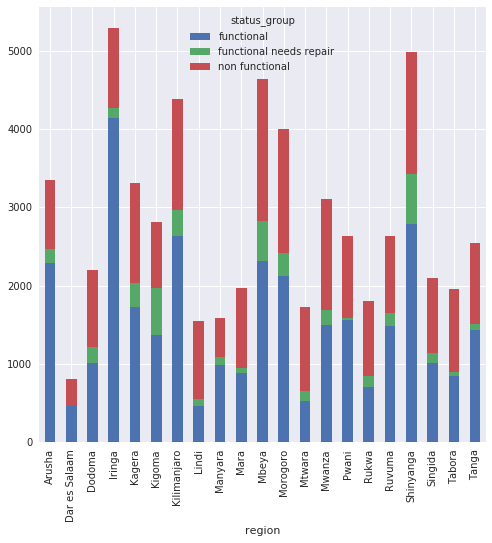

In [10]:
reg_status.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [11]:
qual_status = pd.crosstab(index= df['source'], columns= df['status_group'])

In [12]:
qual_status

status_group,functional,functional needs repair,non functional
source,,,
dam,253,24,379
hand dtw,497,17,360
lake,162,12,591
machine dbh,5422,491,5162
other,126,1,85
rainwater harvesting,1386,314,595
river,5465,1221,2926
shallow well,8324,957,7543
spring,10592,1276,5153


In [13]:
basin_status = pd.crosstab(index= df['basin'], columns= df['status_group'])
basin_status

status_group,functional,functional needs repair,non functional
basin,,,
Internal,4482,557,2746
Lake Nyasa,3324,250,1511
Lake Rukwa,1000,270,1184
Lake Tanganyika,3107,742,2583
Lake Victoria,5100,989,4159
Pangani,5372,477,3091
Rufiji,5068,437,2471
Ruvuma / Southern Coast,1670,326,2497
Wami / Ruvu,3136,269,2582


In [14]:
df['yr_rec'] = df['date_recorded'].apply(lambda x: x[:-6])

In [15]:
rec_status = pd.crosstab(index=df['yr_rec'], columns=df['status_group'])
rec_status

status_group,functional,functional needs repair,non functional
yr_rec,,,
2002,1,0,0
2004,10,1,19
2011,16220,1812,10642
2012,3126,362,2936
2013,12902,2142,9227


In [16]:
const_status = pd.crosstab(index= df['construction_year'], columns=df['status_group'])
const_status

status_group,functional,functional needs repair,non functional
construction_year,,,
0,10555,1789,8365
1960,24,6,72
1961,2,3,16
1962,7,1,22
1963,31,6,48
1964,7,1,32
1965,11,1,7
1966,6,0,11
1967,31,17,40


In [17]:
df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [18]:
extr_type = pd.crosstab(index= df['extraction_type_group'], columns=df['status_group'])

In [19]:
extr_type

status_group,functional,functional needs repair,non functional
extraction_type_group,,,
afridev,1200,42,528
gravity,16048,2701,8031
india mark ii,1448,79,873
india mark iii,44,1,53
mono,1082,129,1654
nira/tanira,5421,641,2092
other,1029,206,5195
other handpump,172,20,172
other motorpump,53,9,60


In [20]:
extr_class= pd.crosstab(index= df['extraction_type_class'], columns=df['status_group'])
extr_class

status_group,functional,functional needs repair,non functional
extraction_type_class,,,
gravity,16048,2701,8031
handpump,10375,995,5086
motorpump,1135,138,1714
other,1029,206,5195
rope pump,293,17,141
submersible,3329,253,2597
wind-powered,50,7,60


In [21]:
id_x = df['id_x']

In [22]:
df.head(2)

,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_y,status_group,yr_rec
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,2013


In [23]:
df.drop(['id_x', 'id_y', 'num_private', 'wpt_name', 'recorded_by', 'date_recorded','waterpoint_type_group','quality_group', 'quantity_group' \
            , 'lga', 'subvillage', 'district_code', 'region_code', 'ward', 'scheme_name', \
            'payment','source', 'source_class', 'extraction_type_class'], axis=1, inplace=True)

In [24]:
df['permit'].fillna(True, inplace=True)
df['public_meeting'].fillna(True, inplace=True)
df['funder'].fillna('Other', inplace=True)
df['installer'].fillna('Other', inplace=True)
df['scheme_management'].fillna('Other', inplace=True)

In [25]:
# finding mean of non-zero values

s = pumps[pumps['population'] != 0]
s.mean()

id                   37107.559115
amount_tsh             447.787681
gps_height             969.889634
longitude               36.074387
latitude                -6.139781
num_private              0.740788
region_code             16.076988
district_code            6.299456
population             281.087167
public_meeting           0.916197
permit                   0.717121
construction_year     1961.399721
dtype: float64

In [26]:
# finding mean of non-zero values

t = pumps[pumps['construction_year'] != 0]
t.mean()

id                   37083.008736
amount_tsh             466.457534
gps_height            1002.367760
longitude               35.983262
latitude                -6.235372
num_private              0.707710
region_code             15.706495
district_code            5.969786
population             269.799617
public_meeting           0.915212
permit                   0.717332
construction_year     1996.814686
dtype: float64

In [27]:
# finding mean of non-zero values

u = pumps[pumps['longitude'] != 0]
u.mean()

id                   37106.488070
amount_tsh             327.645219
gps_height             689.325137
longitude               35.149669
latitude                -5.885572
num_private              0.489060
region_code             15.217615
district_code            5.728311
population             185.570831
public_meeting           0.910734
permit                   0.698672
construction_year     1341.577360
dtype: float64

In [28]:
# finding mean of non-zero values

v = pumps[pumps['latitude'] != 0]
v.mean()

id                   37115.131768
amount_tsh             317.650385
gps_height             668.297239
longitude               34.077427
latitude                -5.706033
num_private              0.474141
region_code             15.297003
district_code            5.629747
population             179.909983
public_meeting           0.909838
permit                   0.689550
construction_year     1300.652475
dtype: float64

In [29]:
# replacing 0s with the mean of the non-zero values
df['population_all'] = df['population'].apply(lambda x: float('281.1') if x == 0 else x)
df['const_year'] = df['construction_year'].apply(lambda x: int('1997') if x == 0 else x)
df['longitude_all'] = df['longitude'].apply(lambda x: float('35.149669') if x == 0 else x)
df['latitude_all'] = df['latitude'].apply(lambda x: float('-5.706033') if x == 0 else x)
df.drop(['longitude', 'latitude', 'population', 'construction_year'], axis=1, inplace=True)

In [30]:
target = pumps_target['status_group']

In [31]:
target_copy = target.copy()

In [32]:
df = df.apply(lambda x: x.mask(x.map(x.value_counts())<15000, 'Other') if x.name in ['funder', 'region', 'installer' ,'management', 'extraction_type'] else x)


In [33]:
pumps_dummy = pd.get_dummies(df, drop_first = True)


In [34]:
pumps_dummy.shape

(59400, 81)

In [35]:
df.to_csv('pumps_dummy.csv')

In [36]:
X_train = pumps_dummy.iloc[:39600]
X_test = pumps_dummy.iloc[39600:]
y_train = pumps_target['status_group'].iloc[:39600]
y_test = pumps_target['status_group'].iloc[39600:]

In [37]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights

array([0.61590146, 4.5376418 , 0.86506324])

In [38]:
p = {'functional':  .61590146, 'functional needs repair':  4.5376418 , 'non functional': .86506324 }

In [39]:
from sklearn.svm import SVC


In [40]:
model = SVC(class_weight = p)

In [41]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200,
  class_weight={'functional': 0.61590146, 'functional needs repair': 4.5376418, 'non functional': 0.86506324},
  coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
pred_tr = model.predict(X_train)

In [43]:
score_train = model.score(X_train, y_train)

In [44]:
print(score_train)

0.9520959595959596


In [45]:
pred_test = model.predict(X_test)

In [46]:
score_test = model.score(X_test, y_test)
print(score_test)

0.7637878787878788


In [49]:
print(confusion_matrix(pred_test, y_test))

# works best for predicting non functional

[[9766  622 2736]
 [ 260  670  142]
 [ 801  116 4687]]


In [48]:
model_one = SVC()

In [50]:
model_one.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
pred_train_one = model_one.predict(X_train)
score_train_one = model_one.score(X_train, y_train)
print(score_train_one)

0.9464393939393939


In [52]:
pred_test_one = model_one.predict(X_test)
score_test_one = model_one.score(X_test, y_test)
print(score_test_one)


0.7736868686868686


In [53]:
print(confusion_matrix(pred_test_one, y_test))
# does well on prediction functional needs repair and non functional 

[[10054   696  2882]
 [   24   589     7]
 [  749   123  4676]]
